In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from dataloader import image_dataset_from_directory
from __future__ import print_function, division




In [ ]:
from google.colab import files


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification/train_images/ -p /content/drive/Shareddrives/huy/leaf/train_img/

404 - Not Found


In [ ]:
!mkdir /content/drive/Shareddrives/huy/leaf/train_img

In [ ]:
! unzip /content/drive/Shareddrives/huy/dataset-original.zip
# ! mkdir ai4vn_2020_1 && mv ai4vn_2020 ai4vn_2020_1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: __MACOSX/dataset-original/cardboard/._cardboard132.jpg  
  inflating: dataset-original/cardboard/cardboard133.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard133.jpg  
  inflating: dataset-original/cardboard/cardboard134.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard134.jpg  
  inflating: dataset-original/cardboard/cardboard135.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard135.jpg  
  inflating: dataset-original/cardboard/cardboard136.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard136.jpg  
  inflating: dataset-original/cardboard/cardboard137.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard137.jpg  
  inflating: dataset-original/cardboard/cardboard138.jpg  
  inflating: __MACOSX/dataset-original/cardboard/._cardboard138.jpg  
  inflating: dataset-original/cardboard/cardboard139.jpg  
  inflating: __MACOSX/dataset-original/c

In [ ]:
# ! unzip /content/drive/Shareddrives/huy/test_set_A_lite.zip
! mv test_set_A_lite /content/ai4vn2/test

In [ ]:
! unzip /content/drive/Shareddrives/huy/sample_data.zip
! mkdir ai4vn_2020_1 && mv ai4vn_2020_1 /content/sample_data/val

Archive:  /content/drive/Shareddrives/huy/sample_data.zip
   creating: sample_data/1/
  inflating: sample_data/1/001500.jpg  
  inflating: sample_data/1/001501.jpg  
  inflating: sample_data/1/001502.png  
  inflating: sample_data/1/001503.jpeg  
  inflating: sample_data/1/001504.jpg  
  inflating: sample_data/1/001505.jpg  
  inflating: sample_data/1/001506.jpg  
  inflating: sample_data/1/001507.jpg  
  inflating: sample_data/1/001508.jpg  
  inflating: sample_data/1/001509.jpg  
  inflating: sample_data/1/001510.jpg  
  inflating: sample_data/1/001511.png  
  inflating: sample_data/1/001512.jpg  
  inflating: sample_data/1/001513.png  
  inflating: sample_data/1/001514.jpg  
  inflating: sample_data/1/001515.jpg  
  inflating: sample_data/1/001516.jpg  
  inflating: sample_data/1/001517.jpg  
  inflating: sample_data/1/001518.png  
  inflating: sample_data/1/001519.jpg  
  inflating: sample_data/1/001520.jpg  
  inflating: sample_data/1/001521.jpg  
  inflating: sample_data/1/001522

In [ ]:
test_dataset1, test_dataset_filenames1 = image_dataset_from_directory('/content/ai4vn2/test',
                                                  shuffle=False,
                                                  batch_size=10,
                                                  image_size=(331,331))

Found 8673 files belonging to 1 classes.


In [ ]:
# ! wget https://drive.google.com/file/d/1HellNNR8dgI6df_VtXImINPMrZ3wcgI0/view


# path_to_data = "/content/sample_data"
train_dir = "/content/dataset-original"
# validation_dir ="/content/sample_data" 

BATCH_SIZE = 20
IMG_SIZE = (331, 331)

NUM_CLASS = 8
train_dataset, train_dataset_filenames = image_dataset_from_directory(train_dir,
                                             validation_split=0.2,
                                             subset="training",
                                             shuffle=True,
                                             seed=505,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [ ]:
validation_dataset, validation_dataset_filenames = image_dataset_from_directory(train_dir,
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  shuffle=True,
                                                  seed=505,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


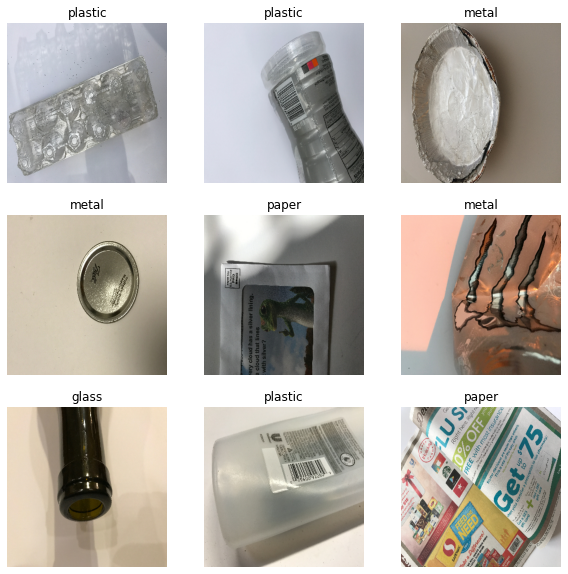

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

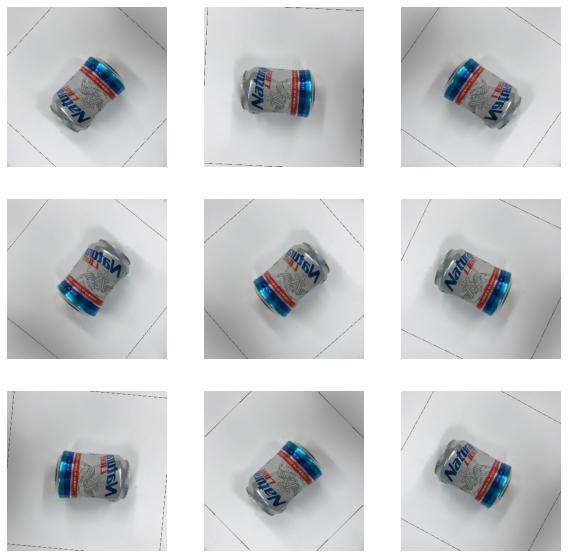

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.DenseNet169(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(20, 10, 10, 1024)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 332, 332, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 165, 165, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 165, 165, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 165, 165, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 165, 165, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 165, 165, 32

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 1024)


In [ ]:
prediction_layer = tf.keras.layers.Dense(NUM_CLASS)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(20, 8)


In [ ]:
inputs = tf.keras.Input(shape=(331, 331, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
tf_op_layer_RealDiv_1 (Tenso [(None, 331, 331, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_1 (TensorFlo [(None, 331, 331, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 10, 10, 1024)      3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 19s 741ms/step - loss: 2.3896 - accuracy: 0.0851


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.26
initial accuracy: 0.07


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/15
143/143 [==============================] - 185s 1s/step - loss: 2.1306 - accuracy: 0.1199 - val_loss: 2.0775 - val_accuracy: 0.1591
Epoch 2/15
143/143 [==============================] - 184s 1s/step - loss: 1.9669 - accuracy: 0.2345 - val_loss: 1.9536 - val_accuracy: 0.2461
Epoch 3/15
143/143 [==============================] - 184s 1s/step - loss: 1.8338 - accuracy: 0.3428 - val_loss: 1.8518 - val_accuracy: 0.3295
Epoch 4/15
143/143 [==============================] - 184s 1s/step - loss: 1.7333 - accuracy: 0.4101 - val_loss: 1.7595 - val_accuracy: 0.3964
Epoch 5/15
143/143 [==============================] - 184s 1s/step - loss: 1.6347 - accuracy: 0.4974 - val_loss: 1.6754 - val_accuracy: 0.4571
Epoch 6/15
143/143 [==============================] - 184s 1s/step - loss: 1.5497 - accuracy: 0.5640 - val_loss: 1.5983 - val_accuracy: 0.5247
Epoch 7/15
143/143 [==============================] - 183s 1s/step - loss: 1.4752 - accuracy: 0.5997 - val_loss: 1.5273 - val_accuracy: 0.5832

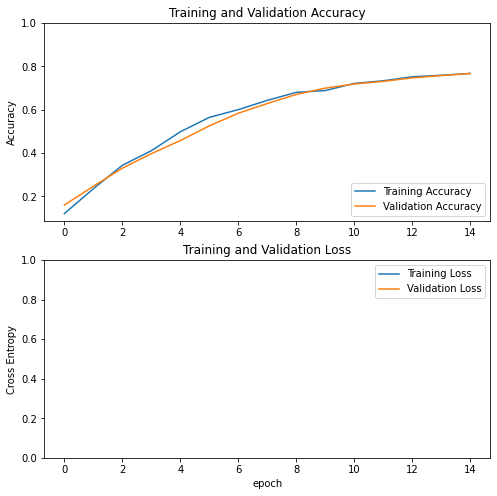

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  1039


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, None, None, 3)     0         
_________________________________________________________________
tf_op_layer_RealDiv_5 (Tenso [(None, 512, 512, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_5 (TensorFlo [(None, 512, 512, 3)]     0         
_________________________________________________________________
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d (Gl (None, 4032)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4032)             

In [ ]:
len(model.trainable_variables)

929

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 15/25
143/143 [==============================] - 437s 3s/step - loss: 0.8862 - accuracy: 0.8058 - val_loss: 0.8547 - val_accuracy: 0.8307
Epoch 16/25
143/143 [==============================] - 432s 3s/step - loss: 0.6708 - accuracy: 0.8454 - val_loss: 0.6600 - val_accuracy: 0.8619
Epoch 17/25
143/143 [==============================] - 432s 3s/step - loss: 0.5214 - accuracy: 0.8745 - val_loss: 0.5284 - val_accuracy: 0.8815
Epoch 18/25
143/143 [==============================] - 432s 3s/step - loss: 0.4325 - accuracy: 0.8924 - val_loss: 0.4381 - val_accuracy: 0.9022
Epoch 19/25
143/143 [==============================] - 432s 3s/step - loss: 0.3625 - accuracy: 0.9117 - val_loss: 0.3723 - val_accuracy: 0.9134
Epoch 20/25
143/143 [==============================] - 432s 3s/step - loss: 0.3198 - accuracy: 0.9124 - val_loss: 0.3273 - val_accuracy: 0.9218
Epoch 21/25
143/143 [==============================] - 432s 3s/step - loss: 0.2808 - accuracy: 0.9201 - val_loss: 0.2934 - val_accuracy:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

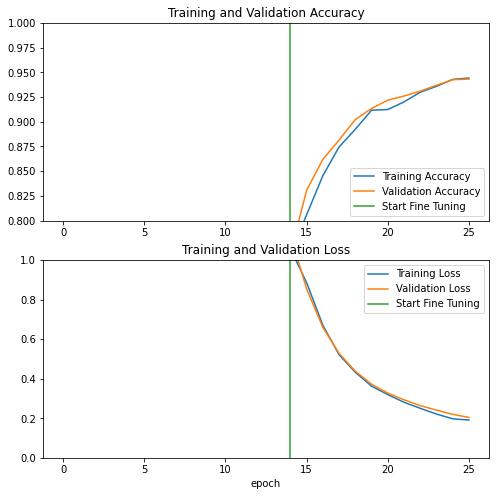

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print('Validation accuracy :', accuracy)

21/21 [==============================] - 6s 263ms/step - loss: nan - accuracy: 0.0190
Validation accuracy : 0.01904761977493763


Predictions:
 [7 3 5 3 6 7 6 6 1 2 6 6 4 1 5 4 1 1 4 1]
Labels:
 [7 3 5 3 6 0 6 6 1 2 6 6 4 1 5 4 1 1 4 1]


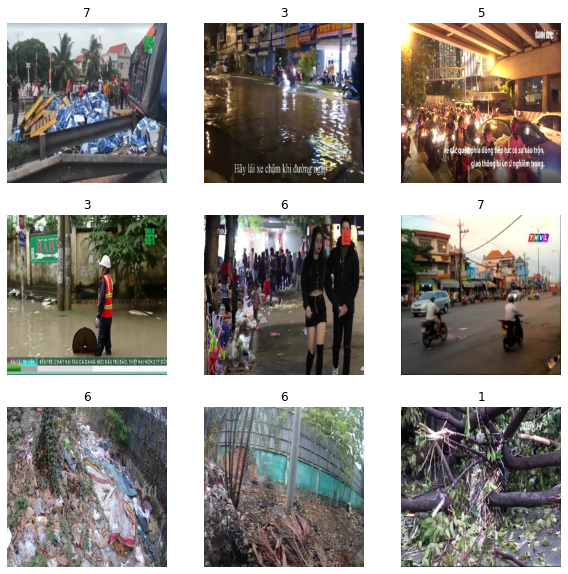

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

predicted_class = np.argmax(predictions, axis=-1)


print('Predictions:\n', predicted_class)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predicted_class[i]])
  plt.axis("off")

In [ ]:
predictions = model.predict(test_dataset1)

predicted_class = np.argmax(predictions, axis=-1)


print('Predictions:\n', predicted_class)

Predictions:
 [7 2 1 ... 5 5 4]


In [ ]:
with open('/content/test5.txt', 'w') as submission_file:
  for filename, predicted in zip(test_dataset_filenames1, predicted_class):
    submission_file.write('{}\t{}\n'.format(filename.split('/')[-1], class_names[predicted]))

In [ ]:
for filename, predicted in zip(validation_dataset_filenames, predicted_class):
  print(filename, class_names[predicted])

/content/sample_data/7/004514.png 5
/content/sample_data/4/003019.png 6
/content/sample_data/2/002020.jpeg 2
/content/sample_data/3/002505.jpg 2
/content/sample_data/1/001525.png 2
/content/sample_data/4/003008.jpg 7
/content/sample_data/5/003503.jpg 1
/content/sample_data/5/003514.jpg 1
/content/sample_data/1/001526.jpg 4
/content/sample_data/1/001517.jpg 4
/content/sample_data/5/003519.jpg 7
/content/sample_data/2/002002.jpeg 5
/content/sample_data/1/001518.png 2
/content/sample_data/7/004518.jpg 6
/content/sample_data/7/004516.jpeg 4
/content/sample_data/3/002511.jpg 7
/content/sample_data/1/001519.jpg 1
/content/sample_data/1/001528.jpg 6
/content/sample_data/7/004508.jpg 5
/content/sample_data/2/002007.jpeg 5
/content/sample_data/1/001509.jpg 5
/content/sample_data/2/002018.jpeg 3
/content/sample_data/1/001500.jpg 6
/content/sample_data/5/003507.jpg 2
/content/sample_data/2/002017.png 3
/content/sample_data/6/004013.jpg 1
/content/sample_data/1/001524.jpg 7
/content/sample_data/5/

In [ ]:
model.save("/content/nasnet_ver1.h5")